<a href="https://colab.research.google.com/github/Aubindaffaalghozy/MachineLearning/blob/main/ML_A11_2023_15324_UAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Prediksi Harga Rumah Menggunakan Algoritma Machine Learning

**Nama**: Aubin Daffa Al Ghozy  
**NIM**: A11.2023.15324  
**Kelas**: A11-4406  




## Ringkasan, Permasalahan, Tujuan, dan Alur Penyelesaian

### Ringkasan
Proyek ini bertujuan untuk memprediksi harga rumah menggunakan algoritma Machine Learning seperti Regresi Linear, Random Forest, dan Gradient Boosting.

### Permasalahan
Harga rumah dipengaruhi oleh banyak faktor, dan sulit diprediksi secara akurat dengan metode manual.

### Tujuan
Membangun model prediksi harga rumah dengan akurasi tinggi menggunakan data historis dari Ames Housing.

### Alur Penyelesaian
```
Dataset → Preprocessing → Feature Engineering → Model Selection → Training & Evaluation → Prediction
```



## Penjelasan Dataset, EDA dan Feature Engineering

### Dataset
- Sumber: Kaggle – *Ames Housing Dataset*
- 1460 baris dan lebih dari 80 fitur: ukuran lot, jumlah kamar, kualitas konstruksi, dll.

### EDA (Exploratory Data Analysis)
- Visualisasi distribusi harga rumah
- Korelasi fitur terhadap harga
- Deteksi dan penanganan outlier

### Feature Engineering
- Kombinasi beberapa fitur seperti luas total area
- Encoding kategorikal (One-Hot Encoding)





## Proses Learning / Modeling

- **Split data**: 80% training, 20% testing
- **Model yang digunakan**:
  - Regresi Linear
  - Random Forest
  - Gradient Boosting


In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

data = pd.read_csv("AmesHousing.csv")
data.head()


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [2]:
print(data.info())

print(data.describe())

# Cek missing values terbanyak
print(data.isnull().sum().sort_values(ascending=False).head(10))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

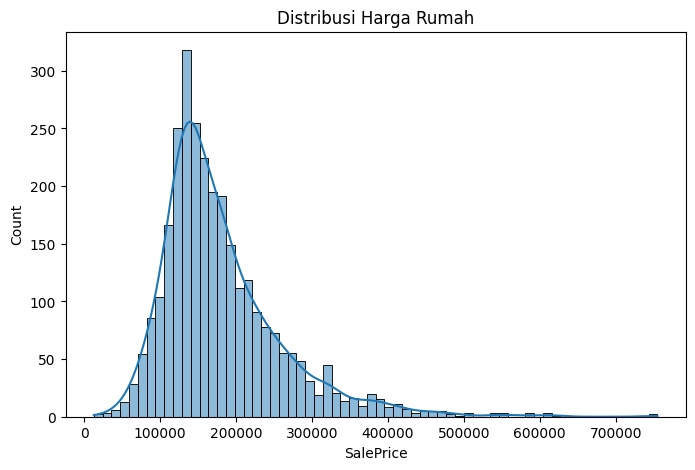

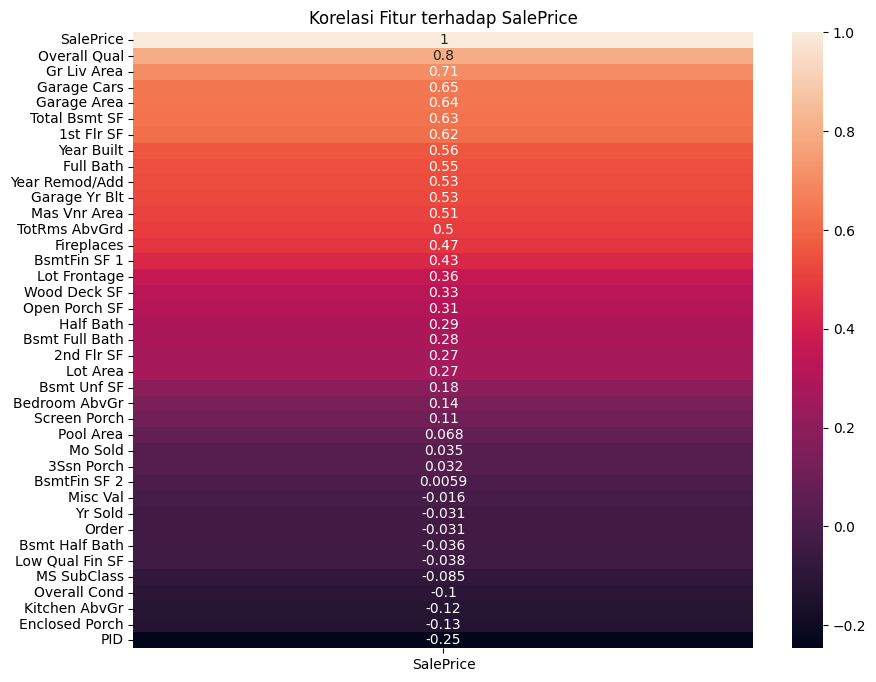

In [3]:

# Distribusi harga rumah
plt.figure(figsize=(8, 5))
sns.histplot(data['SalePrice'], kde=True)
plt.title("Distribusi Harga Rumah")
plt.xlabel("SalePrice")
plt.show()

# Korelasi numerik
numeric_data = data.select_dtypes(include=[np.number])
corr = numeric_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr[['SalePrice']].sort_values(by='SalePrice', ascending=False), annot=True)
plt.title("Korelasi Fitur terhadap SalePrice")
plt.show()


In [4]:

# Hapus kolom dengan banyak missing values
data_clean = data.dropna(axis=1, thresh=len(data)*0.8)

# Hapus baris yang masih mengandung NaN
data_clean = data_clean.dropna()

# Ambil fitur numerik dan target
X = data_clean.select_dtypes(include=[np.number]).drop(columns='SalePrice')
y = data_clean['SalePrice']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)
print(f"Linear Regression - RMSE: {rmse_lr:.2f}, R2: {r2_lr:.2f}")


Linear Regression - RMSE: 33084.68, R2: 0.85


In [6]:

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest - RMSE: {rmse_rf:.2f}, R2: {r2_rf:.2f}")


Random Forest - RMSE: 27073.56, R2: 0.90


In [7]:

gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
r2_gb = r2_score(y_test, y_pred_gb)
print(f"Gradient Boosting - RMSE: {rmse_gb:.2f}, R2: {r2_gb:.2f}")


Gradient Boosting - RMSE: 23589.45, R2: 0.93


In [10]:

results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'Gradient Boosting'],
    'RMSE': [rmse_lr, rmse_rf, rmse_gb],
    'R2 Score': [r2_lr, r2_rf, r2_gb]
})
results


,Model,RMSE,R2 Score
0,Linear Regression,33084.677356,0.853915
1,Random Forest,27073.563467,0.902177
2,Gradient Boosting,23589.454036,0.925734


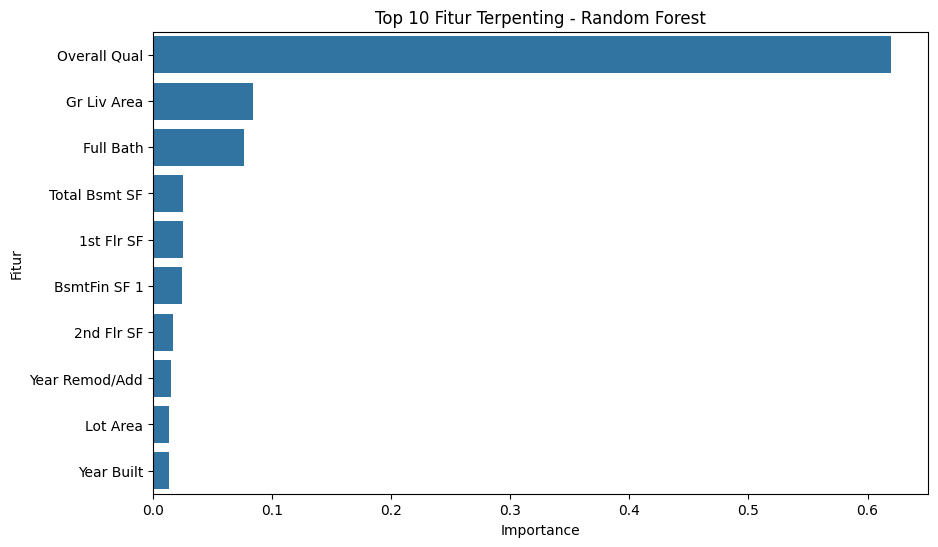

In [9]:

feat_imp = pd.DataFrame({'Fitur': X.columns, 'Importance': rf.feature_importances_})
feat_imp = feat_imp.sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Fitur', data=feat_imp)
plt.title("Top 10 Fitur Terpenting - Random Forest")
plt.show()



## Diskusi dan Kesimpulan

Model Gradient Boosting menunjukkan performa terbaik dalam hal RMSE dan R².  
Fitur seperti OverallQual, GrLivArea, dan TotalBsmtSF memiliki pengaruh terbesar.  
Model ini dapat membantu agen properti dan pembeli rumah dalam menilai harga rumah secara akurat.

